### Task 1

In [2]:
from BranchingProcess import Person, BranchingProcess, read_from_files

In [3]:
# Считали, вывели количество родословных
processes = read_from_files(['N.txt', 'K.txt', 'T.txt', 'W.txt', 'C.txt',\
                             'Q.txt', 'L.txt', 'F.txt', 'J.txt', 'P.txt'])
print('Количество родословных = ', len(processes))

Количество родословных =  76199


In [4]:
# Поработаем с данными. Уберем людей, которые не подходят заданию, женщины. 
# Также удалим пустые процессы, которые остаются, если удалить по 1 человеку в поколении.
# Посчитали теперь количество родословных после чистки

i = 0
j = 0
k = 0
good_people = []
while (i < len(processes)):
    j = 0
    while (j < len(processes[i].generations)):
        k = 0
        while (k < len(processes[i].generations[j])):
            if (processes[i].generations[j][k].name[1] == '-') \
            or (processes[i].generations[j][k].deathdate == '') \
            or (processes[i].generations[j][k].birthday == '') \
            or (int(processes[i].generations[j][k].birthday[:4]) > 1950) \
            or (processes[i].generations[j][k].gender == 'female')\
            or (processes[i].generations[j][k].gender == 'unknown'):
                good_people.append(processes[i].generations[j][k].name)
                del processes[i].generations[j][k]
            else:
                k += 1
        j += 1
    i += 1

# Delet empty generations (happened when delete sole man in generations)   
i = 0
j = 0
while (i < len(processes)):
    j = 0
    while (j < len(processes[i].generations)):
        if (processes[i].generations[j] == []):
            del processes[i].generations[j]
        else:
            j += 1
    i += 1
    
# Delete processes consisting of 1 generation
i = 0
while (i < len(processes)):
    if (len(processes[i].generations) == 1) or (len(processes[i].generations) == 0):
        del processes[i]
    else:
        i += 1

print('Количество родословных после удаления ненужных экземпляров = ', len(processes))

Количество родословных после удаления ненужных экземпляров =  8789


In [5]:
# Здесь удаляем детей, которые были удалены из общего списка
good_people = set(good_people)
for i in range (0, len(processes)):
    for j in range (0, len(processes[i].generations)):
        for k in range (0, len(processes[i].generations[j])):
            for l in processes[i].generations[j][k].children:
                if (l in good_people):
                    processes[i].generations[j][k].children.remove(l)

### Task 2

Maximum number of generations in the family:  53
Minimum number of generations in the family:  2
Average number of generations in the family: 3.49


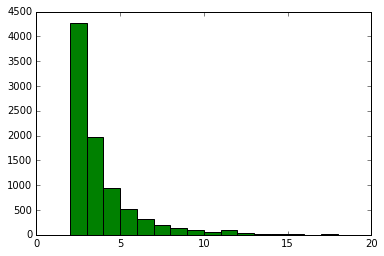

In [6]:
# Здесь мы считаем минимальное, максимальное и среднее число поколений в роду

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


x = list(map(lambda f: len(f.generations), processes))
max_gen_number = np.max(x)
min_gen_number = np.min(x)
average = np.mean(x)
y = [x.count(i) for i in range(1, 20)]
print("Maximum number of generations in the family: ", max_gen_number)
print("Minimum number of generations in the family: ", min_gen_number)
print("Average number of generations in the family: {:.2f}".format(average))
plt.bar(range(1, 20), y, width=1, color='g')
plt.show()

Max_age:  825 Year:  1190
Min_age:  -1728 Year:  1894
Average life duration: 58.13


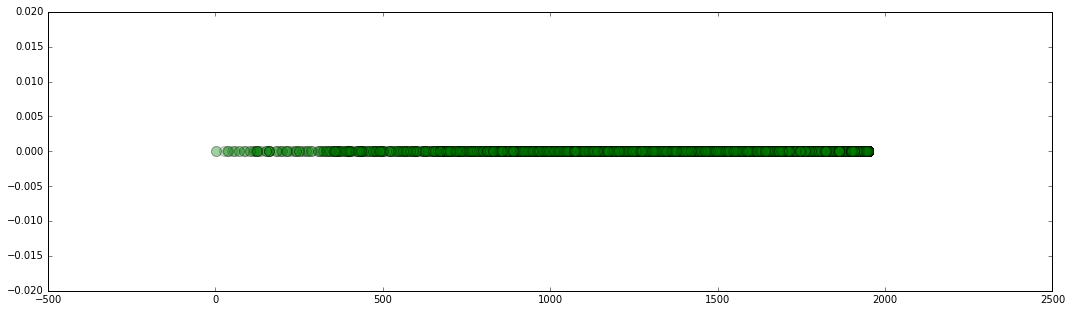

In [7]:
#  The oldest and the youngest man who has ever lived
#  Average life Duration

sum_life_duration = 0
year_max_age = 0
max_age = 0
year_min_age = 0
min_age = 1000
all_people = 0
age = 0
x_year = []
for i in range (len(processes)):
    for j in range (len(processes[i].generations)):
        for k in range (len(processes[i].generations[j])):
            age = (int(processes[i].generations[j][k].deathdate[:4]) - \
                   int(processes[i].generations[j][k].birthday[:4]))
            sum_life_duration += age
            all_people += 1
            x_year.append(int(processes[i].generations[j][k].birthday[:4]))
            if (age > max_age):
                max_age = age
                year_max_age = int(processes[i].generations[j][k].birthday[:4])
            if (age < min_age):
                min_age = age
                year_min_age = int(processes[i].generations[j][k].birthday[:4])
print("Max_age: ", max_age, "Year: ", year_max_age)
print("Min_age: ", min_age, "Year: ", year_min_age)
print("Average life duration: {:.2f}".format(sum_life_duration / all_people))
y_year = np.zeros(len(x_year))
fig = plt.figure(figsize=(18,5))
plt.scatter(x_year, y_year, alpha=0.2, s=100, c='g')
plt.show()

In [9]:
# Выведем человека с такой замечательной продолжительностью жизни:
print((processes[41].generations[1][6]))
# Я буду считать, что это просто опечатка и оставлю его.
# Аналогично максимальное число. Я же не могу у всех такое отследить...

Nabors-259	male	1894-Mar-01	0166-Apr-01	Nabors-248;Gray-13132	Nabors-136;Nabors-267;Nabors-246;Nabors-264;Nabors-262;Nabors-261;Nabors-260;Nabors-266;Nabors-268;Nabors-263		


### Task 3
Выбираю предложенный базовый вариант: пуассоновское распределение.    
Оценка максимального правдоподобия для пуассоновского распределения: $\lambda = \overline{X}$    
Тогда, как и описано там, я считаю $\lambda$ и набор $[\lambda_i]$

In [10]:
# Считает количество всего людей в определенном процессе
def children_amout(process):
    sum_children = 0
    for i in range(0, len(process.generations) - 1):
        for j in range (0, len(process.generations[i])):
            sum_children +=  len(process.generations[i][j].children)
    return sum_children

# Считает количество отцов
def generations_amount(process):
    sum_fathers = 0
    for i in range(0, len(process.generations) - 1):
        sum_fathers += len(process.generations[i])
    return sum_fathers

total_children_amount = np.sum(list(map(lambda x: children_amout(x), processes)))
total_generations_amount = np.sum(list(map(lambda x: generations_amount(x), processes)))
lambda_1 = total_children_amount / total_generations_amount

lambda_2 = [(children_amout(x) / generations_amount(x)) for x in processes]
print("lambda = ", lambda_1)
print("[lambda_i] = ", lambda_2[:10])

lambda =  2.02461504035
[lambda_i] =  [2.0625, 2.3333333333333335, 11.0, 1.0, 1.6666666666666667, 2.0, 1.0, 4.0, 1.9411764705882353, 1.1666666666666667]


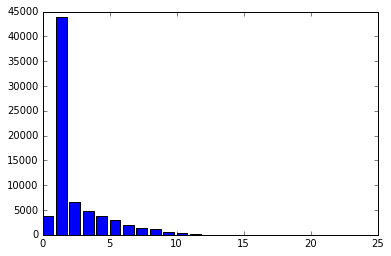

In [11]:
import scipy.stats as sc
# Сторим график: количество людей с таким количеством детей

singly_children_amount = []
for l in range(0, len(processes)):
    for i in range(0, len(processes[l].generations) - 1):
        for j in range (0, len(processes[l].generations[i])):
            singly_children_amount.append(len(processes[l].generations[i][j].children))
                  
plt.bar(range(len(np.bincount(singly_children_amount))), np.bincount(singly_children_amount), color = 'b')
plt.show()

In [12]:
# C помощью хи-квадрат смотрим, действительно ли это пуассоновское распределение
# Но видим, что pvalue = 0, значит, не пуассоновское. 
import scipy.stats as sc 
f_exp = [len(singly_children_amount) * sc.poisson.pmf(x, lambda_1)\
                       for x in range(min(singly_children_amount), max(singly_children_amount) + 1)]
f_obs = np.bincount(singly_children_amount)
sc.chisquare(f_obs, f_exp, ddof=1)

Power_divergenceResult(statistic=2921043612828.7578, pvalue=0.0)

### Task 4    
В одном поколении примерно $\mu ^ n$ детей. Значит, дойти до единого предка мы сможем за $log_{\mu}n$    
Посчитаю, за сколько шагов я смогла приблизиться к предку, сравню, за сколько должна была теоретически.

In [13]:
# Моделируем процесс назад
generations_amount = 0
random_value = 0
size_generation = len(processes)
parents = 0
while (parents != 1):
    parents = 0
    while (size_generation > 0):
        random_value = np.random.poisson(lambda_1, 1)
        size_generation -= random_value
        parents += 1
    size_generation = parents
    generations_amount += 1
        
print("Экспериментально дошла за ", generations_amount)
import math
print("Теоретически должна за ",math.log(len(processes), lambda_1))
print("Значения близки, значит, все верно. Дойти до общего предка получилось.")

Экспериментально дошла за  13
Теоретически должна за  12.874282853517583
Значения близки, значит, все верно. Дойти до общего предка получилось.


### Task 5    
Моделирую процесс вперед. Считаю, что будет через 100, 200, 300, 400 лет. Построила графики, если у меня 1 общий процесс. Поколение достаточно быстро растет.    
Также построила график зависимости количества процессов. Видим, что некоторые процессы все же вырождаются. И их даже достаточно большое количество.

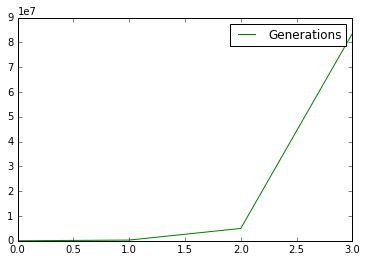

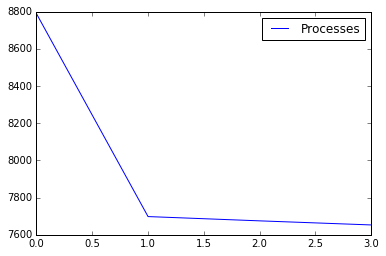

In [19]:
def generate_generation(lam, years, children_last_generation):
    for i in range(0, years // 25):  
        z = np.sum(np.random.poisson(lam, children_last_generation))
        children_last_generation = np.sum(z)
    return children_last_generation, int(children_last_generation == 0)
# Считаю, сколько процессов убилось!
  
y_man = np.zeros(4)
process_amount = np.zeros(4)


# Считать для процессов по-отдельности. Но я не знаю, как нарисовать графики
# для такого большого количетсва процессов

# Считаем, что будет через 400 лет.
for k in range (0, 400, 100):
    tmp = [generate_generation(lambda_1, k, \
                                          len(processes[j].generations[len(processes[j].generations) - 1]))\
                      for j in range (0, len(processes))]
    y_man[k // 100] = np.sum([tmp[i][0] for i in range (0, len(tmp))])
    process_amount[k // 100] = abs(len(processes) - np.sum([tmp[i][1] for i in range (0, len(tmp))]))

x_man = np.arange(4)
plt.plot(x_man, y_man, c='g', label="Generations")
plt.legend()
plt.show()

plt.plot(x_man, process_amount, label="Processes")
plt.legend()
plt.show()



### Task 6    
Выведем, чему же равна у нас производящая функция и посчитаем результат.
$ \varphi_{\xi}(z) = Ez^{\xi} = \sum\limits_{k = 0}^{\infty}P(\xi = k) \cdot z^k = \sum\limits_{k = 0}^{\infty} \frac{e^{-\lambda}\lambda^k}{k!} \cdot z^k = e^{-\lambda} \cdot \sum\limits_{k = 0}^{\infty} \frac{\lambda^k z^k}{k!} = e^{-\lambda} \cdot \sum\limits_{k = 0}^{\infty} \frac{(\lambda z)^k}{k!} = e^{-\lambda} \cdot e^{\lambda z} = e^{\lambda(z-1)}$    
Теперь, чтобы найти вероятность вырождения надо решить такое уравнение:    
$q = \varphi_{\xi}(q)$, или $e^{\lambda(q-1)} = q$

In [29]:
import scipy

def f(x, lm):
    return x-math.e ** (lm * (x-1))

     
# General act of degeneration
print("Вероятность вырождения для общего закона = ", scipy.optimize.root(lambda x: f(x, lambda_1), 0).x[0])

# Separately
amount = 0
results = []
for i in lambda_2:
    results.append(scipy.optimize.root(lambda x: f(x, i), 0).x[0])
    if ( < 0.5):
        amount += 1

print("Доля процессов, в которых вероятность вырождения < 0.5 = {:.2f}".format(amount / len(lambda_2)))
y1 = np.zeros(len(results))
fig = plt.figure(figsize=(15,5))
plt.scatter(results, y1, alpha=0.2, s=100, c='g')
plt.show()

Вероятность вырождения для общего закона =  0.196602726435


KeyboardInterrupt: 

Итог: Фамилии все-таки вырождаются. Но не так быстро.


0.19660272643508975